In [10]:
#We can use list in list, eg a list contains the names of columns and some list contains the values inside the columns
#Create functions that are the same as grouped aggregate, frequency distribution, or descriptive statistics; missing values (isnull()), formatting issues, duplicates addressed (duplicate)

In [11]:
import matplotlib.pyplot as plt

In [12]:
file = open('//Users/thuannguyen/Documents/DATA1002/Datasets + Codes/student_mental_health (dataset 1).csv', 'r')
lines = file.readlines()
file.close()

header = lines[0].strip().split(',')

data_dict = {col: [] for col in header}

for line in lines[1:]:
    row = line.strip().split(',')

    if len(row) == len(header):
        for i, col in enumerate(header):
            value = row[i] if row[i] != "" else None
            data_dict[col].append(value)

In [13]:
#this is the function to print the file (just to print!!!!)
header = list(data_dict.keys())

for column_name in header:
    column_data = data_dict[column_name]
    print('{} = {}'.format(column_name, column_data))

Timestamp = ['8/7/2020 12:02', '8/7/2020 12:04', '8/7/2020 12:05', '8/7/2020 12:06', '8/7/2020 12:13', '8/7/2020 12:31', '8/7/2020 12:32', '8/7/2020 12:33', '8/7/2020 12:35', '8/7/2020 12:39', '8/7/2020 12:39', '8/7/2020 12:39', '8/7/2020 12:40', '8/7/2020 12:41', '8/7/2020 12:43', '8/7/2020 12:43', '8/7/2020 12:46', '8/7/2020 12:52', '8/7/2020 13:05', '8/7/2020 13:07', '8/7/2020 13:12', '8/7/2020 13:13', '8/7/2020 13:13', '8/7/2020 13:15', '8/7/2020 13:17', '8/7/2020 13:29', '8/7/2020 13:35', '8/7/2020 13:41', '8/7/2020 13:58', '8/7/2020 14:05', '8/7/2020 14:27', '8/7/2020 14:29', '8/7/2020 14:29', '8/7/2020 14:31', '8/7/2020 14:41', '8/7/2020 14:43', '8/7/2020 14:43', '8/7/2020 14:45', '8/7/2020 14:47', '8/7/2020 14:56', '8/7/2020 14:57', '8/7/2020 14:57', '8/7/2020 14:58', '8/7/2020 15:07', '8/7/2020 15:08', '8/7/2020 15:09', '8/7/2020 15:12', '8/7/2020 15:14', '8/7/2020 15:14', '8/7/2020 15:18', '8/7/2020 15:27', '8/7/2020 15:37', '8/7/2020 15:47', '8/7/2020 15:48', '8/7/2020 15:57

In [14]:
#Count the number of null data in each column
for column_name, column_data in data_dict.items():
  null_count = 0
  for c in column_data:
    if c == None:
      null_count += 1
  print('Count null "{}" = {}'.format(column_name, null_count))


Count null "Timestamp" = 0
Count null "Choose your gender" = 0
Count null "Age" = 1
Count null "What is your course?" = 0
Count null "Your current year of Study" = 0
Count null "What is your CGPA?" = 0
Count null "Marital status" = 0
Count null "Do you have Depression?" = 0
Count null "Do you have Anxiety?" = 0
Count null "Do you have Panic attack?" = 0
Count null "Did you seek any specialist for a treatment?" = 0


In [15]:
age = data_dict['Age']
print('The null data in in index: {}'.format(age.index(None)))
#There is a null at index 43 of age column --> Fill this data with the mean of existing data
#We will create a copy of age column --> Convert data str -> int --> using aggregate calculation to calculate the mean of existing data
#And then we will fill that result with into the null data of age column


The null data in in index: 43


In [16]:
#As we found a null data --> We replace the null data with the avg of existing data

age_prev = age.copy()
age_prev.pop(age.index(None))
for i in range(len(age_prev)):
    age_prev[i] = int(age_prev[i])
x = 0
for i in age_prev:
    x = x + i
    avg = x//len(age_prev)
avg = str(avg)
age[43] = avg

In [17]:
#Re-count the number of null data in each column after modifying
for column_name, column_data in data_dict.items():
  null_count = 0
  for c in column_data:
    if c == None:
      null_count += 1
  print('Count null "{}" = {}'.format(column_name, null_count))

Count null "Timestamp" = 0
Count null "Choose your gender" = 0
Count null "Age" = 0
Count null "What is your course?" = 0
Count null "Your current year of Study" = 0
Count null "What is your CGPA?" = 0
Count null "Marital status" = 0
Count null "Do you have Depression?" = 0
Count null "Do you have Anxiety?" = 0
Count null "Do you have Panic attack?" = 0
Count null "Did you seek any specialist for a treatment?" = 0


In [18]:
#Count the number of elements in each of the column
for column_name, column_data in data_dict.items():
    count = len(column_data)
    print(f'Count values "{column_name}" = {count}')

#Conclusion: All columns as the same number of elements

Count values "Timestamp" = 101
Count values "Choose your gender" = 101
Count values "Age" = 101
Count values "What is your course?" = 101
Count values "Your current year of Study" = 101
Count values "What is your CGPA?" = 101
Count values "Marital status" = 101
Count values "Do you have Depression?" = 101
Count values "Do you have Anxiety?" = 101
Count values "Do you have Panic attack?" = 101
Count values "Did you seek any specialist for a treatment?" = 101


In [19]:
#Check for duplicates in the dataset
header = list(data_dict.keys())
row = []
for i in range(len(data_dict[header[0]])):
    a = []
    for x in header:
        value = data_dict[x][i]
        a.append(value)
    row.append(tuple(a))

prev = len(row)
row_set = set(row)
last = len(row_set)

duplicate = last - prev

print('Duplicate: {}'.format(duplicate))


Duplicate: 0


In [20]:
#Check for the type of data in each column 
x = 0 
for column_name, column_data in data_dict.items():
    print('Type of {}: {}'.format(column_name, type(column_data[x])))

Type of Timestamp: <class 'str'>
Type of Choose your gender: <class 'str'>
Type of Age: <class 'str'>
Type of What is your course?: <class 'str'>
Type of Your current year of Study: <class 'str'>
Type of What is your CGPA?: <class 'str'>
Type of Marital status: <class 'str'>
Type of Do you have Depression?: <class 'str'>
Type of Do you have Anxiety?: <class 'str'>
Type of Do you have Panic attack?: <class 'str'>
Type of Did you seek any specialist for a treatment?: <class 'str'>


STEP 2: DESCRIPTIVE ANALYSIS | Part 1: Numeric data (Age)

In [21]:
#Here we re-calculate the mean of age, or something,... (depends on the purpose)
for i in range(len(age)):
    age[i] = int(age[i])

x = 0
for i in age:
    x = x + i
    mean = x/len(age)
print('Mean age is: {:.2f}'.format(mean))

Mean age is: 20.52


In [22]:
#Finding highest age
maximum = 0
for data in age:
    if data > maximum:
        maximum = data
print('Highest Age: {}'.format(maximum))

#Finding youngest age
minimum = maximum
for data in age:
    if data < minimum:
        minimum = data
print('Youngest Age: {}'.format(minimum))

#Finding range:
age_range = maximum - minimum
print('Range: {}'.format(age_range))

Highest Age: 24
Youngest Age: 18
Range: 6


In [23]:
#Standard deviation of Age
x = 0
for a in age:
  y = (int(a) - int(avg))**2
  x += y
var = x/(len(data_dict['Age'])-1)
std = var**0.5
print('Standard deviation Age: {:.2f}'.format(std))

Standard deviation Age: 2.54


In [24]:
#Median age:
n = len(age)
if len(age) % 2 == 0:
    i = (len(age)+1)/2 -1
    med = age[i]
elif n % 2 != 0:
    i = int((n/2 + (n/2+1))//2) -1
    med = age[i]
print('Median age: {}'.format(med))


Median age: 23


In [25]:
#Frequency of age column
age_set = set(age)

age_dict = {years: 0 for years in age_set}

for years in age:
    age_dict[years] += 1

age_data = []
#Mode of age column:
for age_key in list(age_dict.keys()):
    age_d = age_dict[age_key]
    age_data.append(age_d)
    

high = 0 #maximum of age_data
for i in age_data:
    if high < i:
        high = i

for age_key, age_d in age_dict.items():
    rate = (age_d/n) *100 
    print('People in {}: {} ({:.2f}%)'.format(age_key, age_d, rate))

for age_key, age_d in age_dict.items():
    if age_d == high:
        print(" --> Mode (Age) = {}".format(age_key))




People in 18: 32 (31.68%)
People in 19: 21 (20.79%)
People in 20: 7 (6.93%)
People in 21: 3 (2.97%)
People in 22: 2 (1.98%)
People in 23: 13 (12.87%)
People in 24: 23 (22.77%)
 --> Mode (Age) = 18


In [26]:
#Q1 and Q3
age.sort()
lower_data = age[0: n//2]
upper_data = age[n//2: -1]
n1 = len(lower_data)
n2 = len(upper_data)


#Q1 is the median of the first 50% of the data
if len(lower_data) % 2 == 0:
    i = int((len(lower_data)+1)/2) -1
    q1 = lower_data[i]
elif len(lower_data) % 2 != 0:
    i = int((n1/2 + (n1/2+1))//2) -1
    q1 = lower_data[i]
print('Q1 (Age): {}'.format(q1))

#Q3
if len(upper_data) % 2 == 0:
    j = int((n2+1)/2) -1
    q3 = upper_data[j]
elif len(upper_data) % 2 != 0:
    j = int((n2/2 + (n2/2+1))//2) -1
    q3 = upper_data[j]
print('Q3 (Age): {}'.format(q3))



Q1 (Age): 18
Q3 (Age): 23


In [27]:
#Count number of ouliers in age column
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = []
for a in age:
    if a < lower_bound or a > upper_bound:
        outliers.append(a)
print('Number of outliers (Age): {}'.format(len(outliers)))

Number of outliers (Age): 0


Part 2: Categorical Data

In [28]:
#Frequency of gender, Rate of genders in the dataset
sex = data_dict["Choose your gender"]
gender = set(data_dict["Choose your gender"])

gender_dict = {gen: 0 for gen in gender}

for gen in data_dict["Choose your gender"]:
    gender_dict[gen] += 1

for gen_k, gen_v in gender_dict.items():
    rate = (gen_v/len(sex))*100
    print('{}: {} ({:.2f}%)'.format(gen_k, gen_v, rate))

Male: 26 (25.74%)
Female: 75 (74.26%)


In [29]:
#Only choose the top 20 popular courses, with some valid courses: BCS, Engineering, LAW, MEDICINE, ARCHITECTURE, 
#BUSINESS, ACCOUNTING, ECONOMICS, FINANCE, MARKETING, PSYCHOLOGY, BIOLOGY, CHEMISTRY, PHYSICS, MATHEMATICS, 
#IT, NURSING, DENTISTRY, ENGINEERING

#Count the number of students in each course, and rate of students in
valid_courses = [
    "bcs", "engineering", "law", "medicine", "architecture",
    "business", "accounting", "economics", "finance", "marketing",
    "psychology", "biology", "chemistry", "physics", "mathematics",
    "bit", "nursing", "dentistry", "biomedical science",
    "biotechnology", "communication", "diploma nursing", "banking studies",
    "human resources", "marine science"
]

course_original = data_dict["What is your course?"]
clean_course = []
for course in course_original:
    course_name = course.lower().strip()
    if course_name == "bcs":
        clean_course.append("bachelor of science")
    elif course_name == "bit":
        clean_course.append("bachelor of IT")
    elif course_name == "eng" or course_name == "engin" or course_name == "engine" or course_name == "engineering":
        clean_course.append("bachelor of engineering")
    elif course_name in valid_courses:
        clean_course.append(course_name)
    else:
        clean_course.append("invalid")

course_set = set(clean_course)
course_dict = {course: 0 for course in course_set}

for course in clean_course:
    course_dict[course] += 1

sorted_courses = sorted(course_dict.items(), key=lambda item: item[1], reverse=True)
top_20_courses = sorted_courses[:20]

total_students = len(clean_course)
for course_name, count in top_20_courses:
    rate = (count / total_students) * 100
    print(f'{course_name.title()if course_name != "bachelor of IT" else "Bachelor Of IT"}: {count} ({(count / total_students) * 100:.2f}%)')


Invalid: 36 (35.64%)
Bachelor Of Engineering: 20 (19.80%)
Bachelor Of Science: 18 (17.82%)
Bachelor Of IT: 10 (9.90%)
Biomedical Science: 4 (3.96%)
Psychology: 3 (2.97%)
Accounting: 1 (0.99%)
Biotechnology: 1 (0.99%)
Diploma Nursing: 1 (0.99%)
Communication: 1 (0.99%)
Nursing: 1 (0.99%)
Marine Science: 1 (0.99%)
Human Resources: 1 (0.99%)
Mathematics: 1 (0.99%)
Banking Studies: 1 (0.99%)
Law: 1 (0.99%)


In [30]:
year_original = data_dict["Your current year of Study"]
clean_year = []
for year in year_original:
    year_name = year.lower()
    clean_year.append(year_name)
year_set = set(clean_year)

year_dict = {year: 0 for year in year_set}

for year in clean_year:
    year_dict[year] += 1

for year_k, year_v in year_dict.items():
    rate = (year_v/len(year_original))*100
    print('{}: {} ({:.2f}%)'.format(year_k.title(), year_v, rate))

Year 4: 8 (7.92%)
Year 1: 43 (42.57%)
Year 3: 24 (23.76%)
Year 2: 26 (25.74%)


In [31]:
#What is your CGPA
gpa_original = data_dict["What is your CGPA?"]
clean_gpa = []
for gpa in gpa_original:
    gpa_name = gpa.lower().strip()
    clean_gpa.append(gpa_name)
gpa_set = set(clean_gpa)

gpa_dict = {gpa: 0 for gpa in gpa_set}

for gpa in clean_gpa:
    gpa_dict[gpa] += 1

for gpa_k, gpa_v in gpa_dict.items():
    rate = (gpa_v/len(gpa_original))*100
    print('{}: {} ({:.2f}%)'.format(gpa_k, gpa_v, rate))


2.00 - 2.49: 2 (1.98%)
3.50 - 4.00: 48 (47.52%)
3.00 - 3.49: 43 (42.57%)
2.50 - 2.99: 4 (3.96%)
0 - 1.99: 4 (3.96%)


In [32]:
#Marital status
status_original = data_dict["Marital status"]
clean_status = []
for status in status_original:
    status_name = status.lower()
    clean_status.append(status_name)
status_set = set(clean_status)

status_dict = {status: 0 for status in status_set}

for status in clean_status:
    status_dict[status] += 1

print('Marital status:')
for status_k, status_v in status_dict.items():
    rate = (status_v/len(status_original)) * 100
    print('{}: {} ({:.2f}%)'.format(status_k.title(), status_v, rate))

Marital status:
No: 85 (84.16%)
Yes: 16 (15.84%)


In [33]:
#Do you have Depression?
dep_original = data_dict["Do you have Depression?"]
clean_dep = []
for dep in dep_original:
    dep_name = dep.lower()
    clean_dep.append(dep_name)
dep_set = set(clean_dep)

dep_dict = {dep: 0 for dep in dep_set}

for dep in clean_dep:
    dep_dict[dep] += 1

print('Depression:')
for dep_k, dep_v in dep_dict.items():
    rate = (dep_v/len(dep_original)) * 100
    print('{}: {} ({:.2f}%)'.format(dep_k.title(), dep_v, rate))

Depression:
No: 66 (65.35%)
Yes: 35 (34.65%)


In [34]:
#Do you have Anxiety?
anx_original = data_dict["Do you have Anxiety?"]
clean_anx = []
for anx in anx_original:
    anx_name = anx.lower()
    clean_anx.append(anx_name)
anx_set = set(clean_anx)

anx_dict = {anx: 0 for anx in anx_set}

for anx in clean_anx:
    anx_dict[anx] += 1

print('Anxiety:')
for anx_k, anx_v in anx_dict.items():
    rate = (anx_v/len(anx_original)) * 100
    print('{}: {} ({:.2f}%)'.format(anx_k.title(), anx_v, rate))

Anxiety:
No: 67 (66.34%)
Yes: 34 (33.66%)


In [35]:
#Do you have Panic attack?
pan_original = data_dict["Do you have Panic attack?"]
clean_pan = []
for pan in pan_original:
    pan_name = pan.lower()
    clean_pan.append(pan_name)
pan_set = set(clean_pan)

pan_dict = {pan: 0 for pan in pan_set}

for pan in clean_pan:
    pan_dict[pan] += 1

print('Panic?:')
for pan_k, pan_v in pan_dict.items():
    rate = (pan_v/len(pan_original)) * 100
    print('{}: {} ({:.2f}%)'.format(pan_k.title(), pan_v, rate))

Panic?:
No: 68 (67.33%)
Yes: 33 (32.67%)


In [36]:
#Did you seek any specialist for a treatment?
treat_original = data_dict["Did you seek any specialist for a treatment?"]
clean_treat = []
for treat in treat_original:
    treat_name = treat.lower()
    clean_treat.append(treat_name)
treat_set = set(clean_treat)

treat_dict = {treat: 0 for treat in treat_set}

for treat in clean_treat:
    treat_dict[treat] += 1

print('Treatment? :')
for treat_k, treat_v in treat_dict.items():
    rate = (treat_v/len(treat_original)) * 100
    print('{}: {} ({:.2f}%)'.format(treat_k.title(), treat_v, rate))

Treatment? :
No: 95 (94.06%)
Yes: 6 (5.94%)


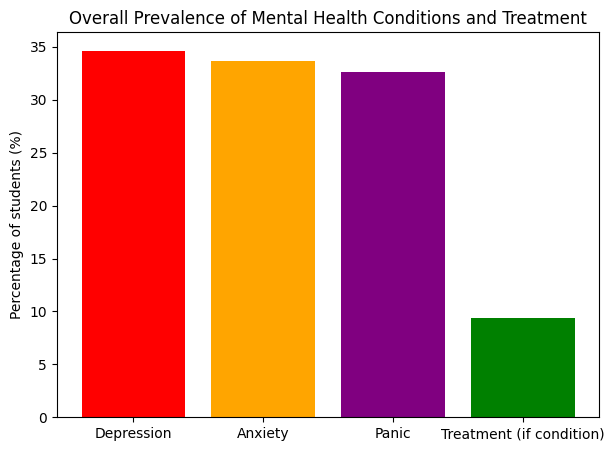

In [37]:
depression = data_dict["Do you have Depression?"]
anxiety = data_dict["Do you have Anxiety?"]
panic = data_dict["Do you have Panic attack?"]
treatment = data_dict["Did you seek any specialist for a treatment?"]

total = len(depression)

# Count prevalence of each condition
dep_yes = depression.count("Yes")
anx_yes = anxiety.count("Yes")
panic_yes = panic.count("Yes")

# Count treatment among those with at least one condition
condition_count = 0
treatment_count = 0
for i in range(total):
    has_condition = (depression[i] == "Yes") or (anxiety[i] == "Yes") or (panic[i] == "Yes")
    if has_condition:
        condition_count += 1
        if treatment[i] == "Yes":
            treatment_count += 1

treated_percent = treatment_count / condition_count * 100 if condition_count > 0 else 0

# Values for plotting
labels = ["Depression", "Anxiety", "Panic", "Treatment (if condition)"]
percents = [
    dep_yes / total * 100,
    anx_yes / total * 100,
    panic_yes / total * 100,
    treated_percent
]

# Plot
plt.figure(figsize=(7,5))
plt.bar(labels, percents, color=["red","orange","purple","green"])
plt.ylabel("Percentage of students (%)")
plt.title("Overall Prevalence of Mental Health Conditions and Treatment")

plt.savefig('mental_health_prevalence.jpg')
plt.show()

Depression vs Year of Study (with %):

Yes:
  Year 1: 14 (40.00%)
  Year 3: 10 (28.57%)
  Year 2: 10 (28.57%)
  Year 4: 1 (2.86%)

No:
  Year 2: 16 (24.24%)
  Year 4: 7 (10.61%)
  Year 1: 29 (43.94%)
  Year 3: 14 (21.21%)

Depression vs CGPA (with %):

Yes:
  3.00 - 3.49: 19 (54.29%)
  3.50 - 4.00: 13 (37.14%)
  2.50 - 2.99: 3 (8.57%)

No:
  3.00 - 3.49: 24 (36.36%)
  3.50 - 4.00: 35 (53.03%)
  2.50 - 2.99: 1 (1.52%)
  2.00 - 2.49: 2 (3.03%)
  0 - 1.99: 4 (6.06%)


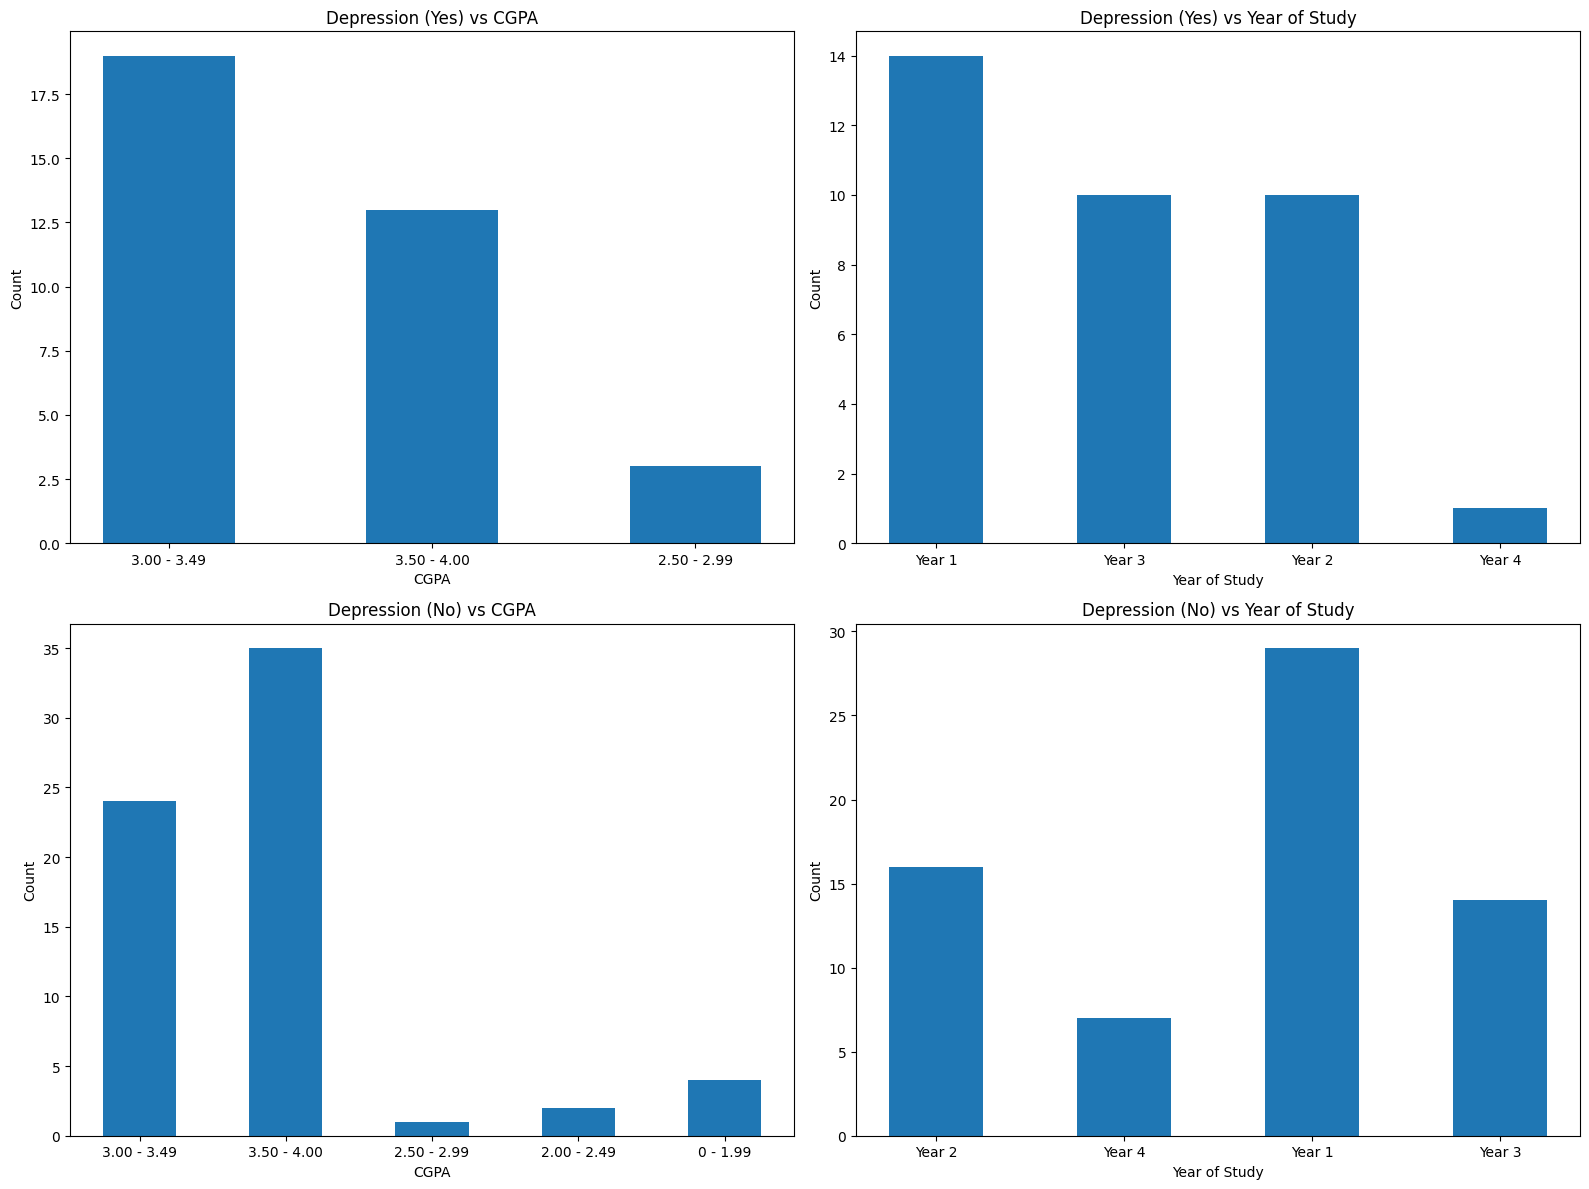

In [38]:
# Group aggregate: Depression vs Year of Study and CGPA (no Counter, no zip)

# Use the cleaned lists directly
group_values = clean_dep
year_values = clean_year
gpa_values = clean_gpa
    
# Depression vs Year of Study with percentage
print("Depression vs Year of Study (with %):")
group_year = {}

for i in range(len(group_values)):
    grp = group_values[i]
    year = year_values[i].lower()
    if grp not in group_year:
        group_year[grp] = {}
    if year not in group_year[grp]:
        group_year[grp][year] = 0
    group_year[grp][year] += 1

for grp in group_year:
    total = sum(group_year[grp].values())
    print(f"\n{grp.title()}:")
    for year in group_year[grp]:
        count = group_year[grp][year]
        percent = (count / total) * 100
        print(f"  {year.title()}: {count} ({percent:.2f}%)")

# Depression vs CGPA with percentage
print("\nDepression vs CGPA (with %):")
group_gpa = {}

for i in range(len(group_values)):
    grp = group_values[i]
    gpa = gpa_values[i].lower()
    if grp not in group_gpa:
        group_gpa[grp] = {}
    if gpa not in group_gpa[grp]:
        group_gpa[grp][gpa] = 0
    group_gpa[grp][gpa] += 1

for grp in group_gpa:
    total = sum(group_gpa[grp].values())
    print(f"\n{grp.title()}:")
    for gpa in group_gpa[grp]:
        count = group_gpa[grp][gpa]
        percent = (count / total) * 100
        print(f"  {gpa}: {count} ({percent:.2f}%)")

# Prepare indices for "yes" and "no" depression
dep_yes_indices = [i for i, d in enumerate(clean_dep) if d == "yes"]
dep_no_indices = [i for i, d in enumerate(clean_dep) if d == "no"]

cgpa_yes = [clean_gpa[i] for i in dep_yes_indices]
year_yes = [clean_year[i] for i in dep_yes_indices]
cgpa_no = [clean_gpa[i] for i in dep_no_indices]
year_no = [clean_year[i] for i in dep_no_indices]

# Function to get unique values and their counts
def get_counts(values):
    unique = []
    counts = []
    for v in values:
        if v not in unique:
            unique.append(v)
            counts.append(1)
        else:
            idx = unique.index(v)
            counts[idx] += 1
    return unique, counts

cgpa_labels_yes, cgpa_counts_yes = get_counts(cgpa_yes)
year_labels_yes, year_counts_yes = get_counts(year_yes)
cgpa_labels_no, cgpa_counts_no = get_counts(cgpa_no)
year_labels_no, year_counts_no = get_counts(year_no)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Depression YES vs CGPA
axes[0, 0].bar(
    [k.upper() for k in cgpa_labels_yes],
    cgpa_counts_yes,
    width=0.5
)
axes[0, 0].set_title('Depression (Yes) vs CGPA')
axes[0, 0].set_xlabel('CGPA')
axes[0, 0].set_ylabel('Count')

# Depression YES vs Year of Study
axes[0, 1].bar(
    [k.title() for k in year_labels_yes],
    year_counts_yes,
    width=0.5
)
axes[0, 1].set_title('Depression (Yes) vs Year of Study')
axes[0, 1].set_xlabel('Year of Study')
axes[0, 1].set_ylabel('Count')

# Depression NO vs CGPA
axes[1, 0].bar(
    [k.upper() for k in cgpa_labels_no],
    cgpa_counts_no,
    width=0.5
)
axes[1, 0].set_title('Depression (No) vs CGPA')
axes[1, 0].set_xlabel('CGPA')
axes[1, 0].set_ylabel('Count')

# Depression NO vs Year of Study
axes[1, 1].bar(
    [k.title() for k in year_labels_no],
    year_counts_no,
    width=0.5
)
axes[1, 1].set_title('Depression (No) vs Year of Study')
axes[1, 1].set_xlabel('Year of Study')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()

plt.savefig('depression_vs_cgpa_year.png')
plt.show()

Anxiety vs Year of Study (with %):
No:
  Year 1: 29 (43.28%)
  Year 3: 16 (23.88%)
  Year 4: 6 (8.96%)
  Year 2: 16 (23.88%)
Yes:
  Year 2: 10 (29.41%)
  Year 1: 14 (41.18%)
  Year 4: 2 (5.88%)
  Year 3: 8 (23.53%)

Anxiety vs CGPA (with %):
No:
  3.00 - 3.49: 28 (41.79%)
  3.50 - 4.00: 30 (44.78%)
  2.50 - 2.99: 3 (4.48%)
  2.00 - 2.49: 2 (2.99%)
  0 - 1.99: 4 (5.97%)
Yes:
  3.00 - 3.49: 15 (44.12%)
  3.50 - 4.00: 18 (52.94%)
  2.50 - 2.99: 1 (2.94%)


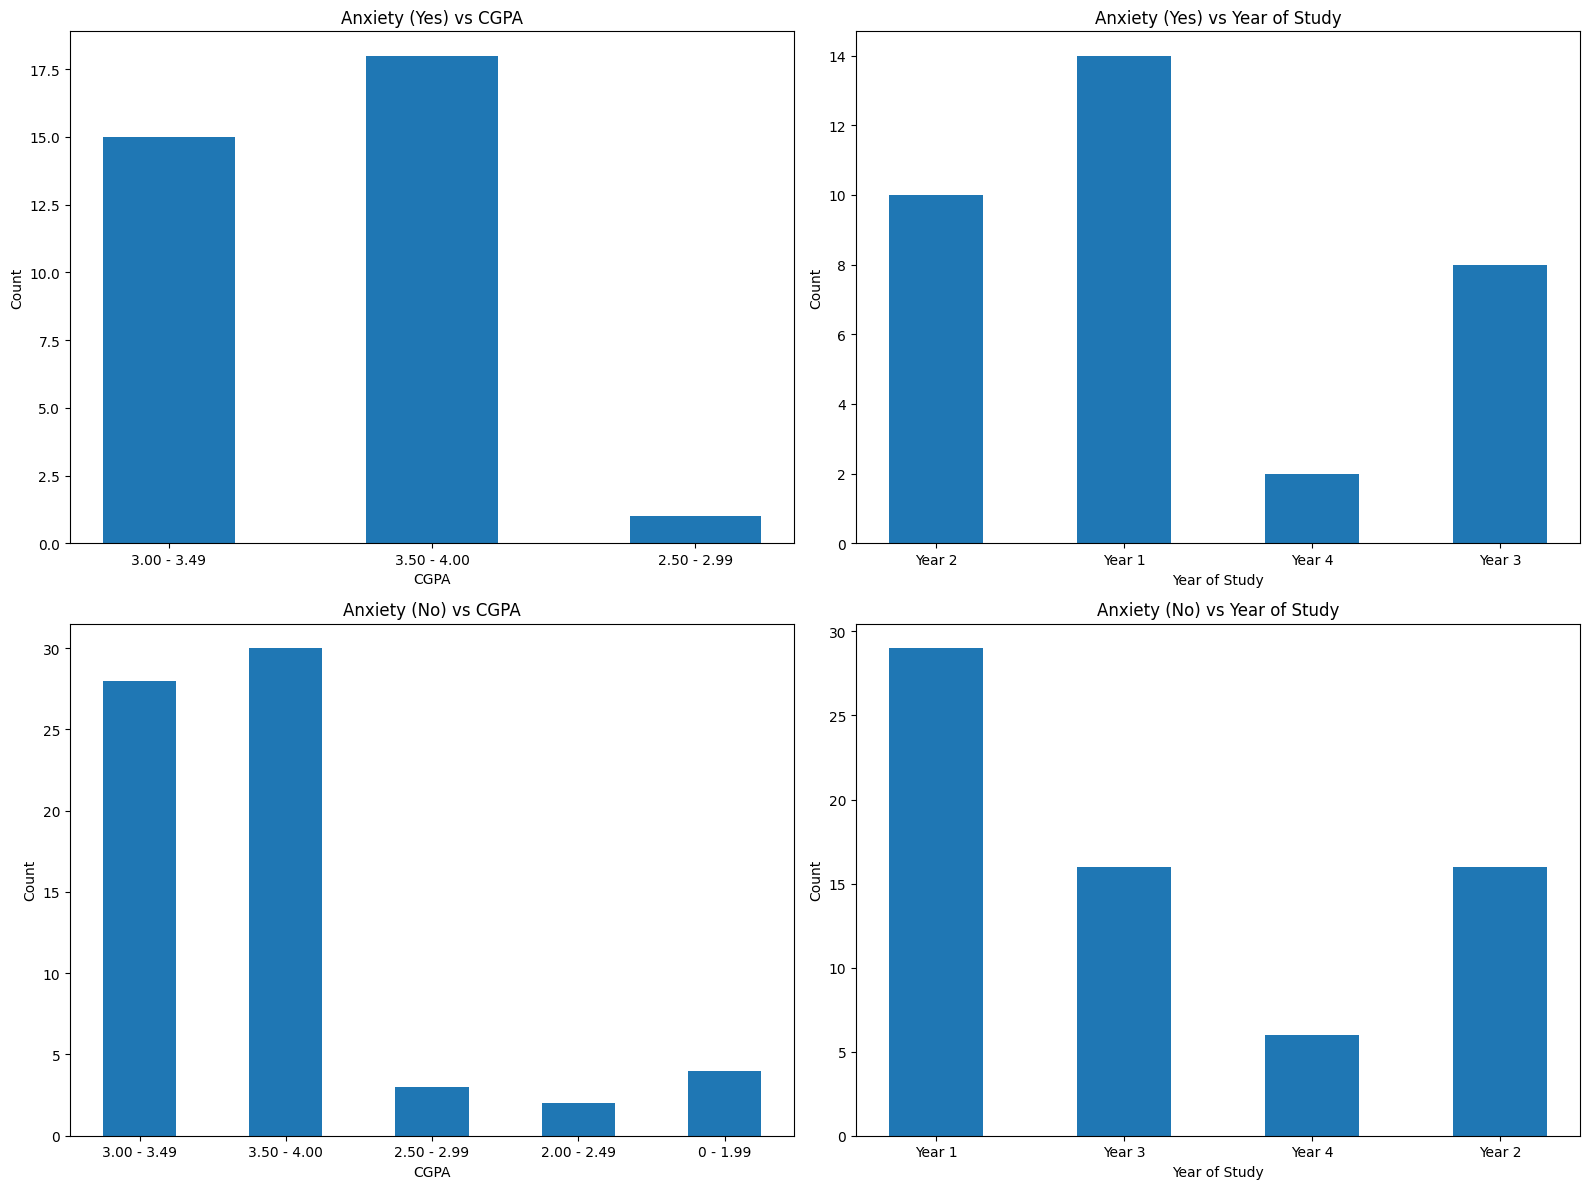

In [39]:
# Use the cleaned lists directly
group_values_dep = clean_anx
    
# Anxiety vs Year of Study with percentage
print("Anxiety vs Year of Study (with %):")
group_year = {}

for i in range(len(group_values_dep)):
    grp = group_values_dep[i]
    year = year_values[i].lower()
    if grp not in group_year:
        group_year[grp] = {}
    if year not in group_year[grp]:
        group_year[grp][year] = 0
    group_year[grp][year] += 1

for grp in group_year:
    total = sum(group_year[grp].values())
    print(f"{grp.title()}:")
    for year in group_year[grp]:
        count = group_year[grp][year]
        percent = (count / total) * 100
        print(f"  {year.title()}: {count} ({percent:.2f}%)")

# Anxiety vs CGPA with percentage
print("\nAnxiety vs CGPA (with %):")
group_gpa = {}

for i in range(len(group_values_dep)):
    grp = group_values_dep[i]
    gpa = gpa_values[i].lower()
    if grp not in group_gpa:
        group_gpa[grp] = {}
    if gpa not in group_gpa[grp]:
        group_gpa[grp][gpa] = 0
    group_gpa[grp][gpa] += 1

for grp in group_gpa:
    total = sum(group_gpa[grp].values())
    print(f"{grp.title()}:")
    for gpa in group_gpa[grp]:
        count = group_gpa[grp][gpa]
        percent = (count / total) * 100
        print(f"  {gpa}: {count} ({percent:.2f}%)")

# Prepare indices for "yes" and "no" ANXIETY
anx_yes_indices = [i for i, a in enumerate(clean_anx) if a == "yes"]
anx_no_indices  = [i for i, a in enumerate(clean_anx) if a == "no"]

# Slice CGPA / Year by those indices
cgpa_yes = [clean_gpa[i] for i in anx_yes_indices]
year_yes = [clean_year[i] for i in anx_yes_indices]
cgpa_no  = [clean_gpa[i] for i in anx_no_indices]
year_no  = [clean_year[i] for i in anx_no_indices]

# Unique labels + counts (reuses your get_counts)
cgpa_labels_yes, cgpa_counts_yes = get_counts(cgpa_yes)
year_labels_yes, year_counts_yes = get_counts(year_yes)
cgpa_labels_no,  cgpa_counts_no  = get_counts(cgpa_no)
year_labels_no,  year_counts_no  = get_counts(year_no)

# Plot (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Anxiety YES vs CGPA
axes[0, 0].bar([k.upper() for k in cgpa_labels_yes], cgpa_counts_yes, width=0.5)
axes[0, 0].set_title('Anxiety (Yes) vs CGPA')
axes[0, 0].set_xlabel('CGPA'); axes[0, 0].set_ylabel('Count')

# Anxiety YES vs Year of Study
axes[0, 1].bar([k.title() for k in year_labels_yes], year_counts_yes, width=0.5)
axes[0, 1].set_title('Anxiety (Yes) vs Year of Study')
axes[0, 1].set_xlabel('Year of Study'); axes[0, 1].set_ylabel('Count')

# Anxiety NO vs CGPA
axes[1, 0].bar([k.upper() for k in cgpa_labels_no], cgpa_counts_no, width=0.5)
axes[1, 0].set_title('Anxiety (No) vs CGPA')
axes[1, 0].set_xlabel('CGPA'); axes[1, 0].set_ylabel('Count')

# Anxiety NO vs Year of Study
axes[1, 1].bar([k.title() for k in year_labels_no], year_counts_no, width=0.5)
axes[1, 1].set_title('Anxiety (No) vs Year of Study')
axes[1, 1].set_xlabel('Year of Study'); axes[1, 1].set_ylabel('Count')

plt.tight_layout()

plt.savefig('anxiety_cgpa_year.png')
plt.show()

Panic vs Year of Study (with %):
Yes:
  Year 1: 14 (42.42%)
  Year 2: 8 (24.24%)
  Year 4: 1 (3.03%)
  Year 3: 10 (30.30%)
No:
  Year 2: 18 (26.47%)
  Year 3: 14 (20.59%)
  Year 4: 7 (10.29%)
  Year 1: 29 (42.65%)

Panic vs CGPA (with %):
Yes:
  3.00 - 3.49: 9 (27.27%)
  3.50 - 4.00: 19 (57.58%)
  2.50 - 2.99: 3 (9.09%)
  2.00 - 2.49: 1 (3.03%)
  0 - 1.99: 1 (3.03%)
No:
  3.00 - 3.49: 34 (50.00%)
  3.50 - 4.00: 29 (42.65%)
  2.50 - 2.99: 1 (1.47%)
  2.00 - 2.49: 1 (1.47%)
  0 - 1.99: 3 (4.41%)


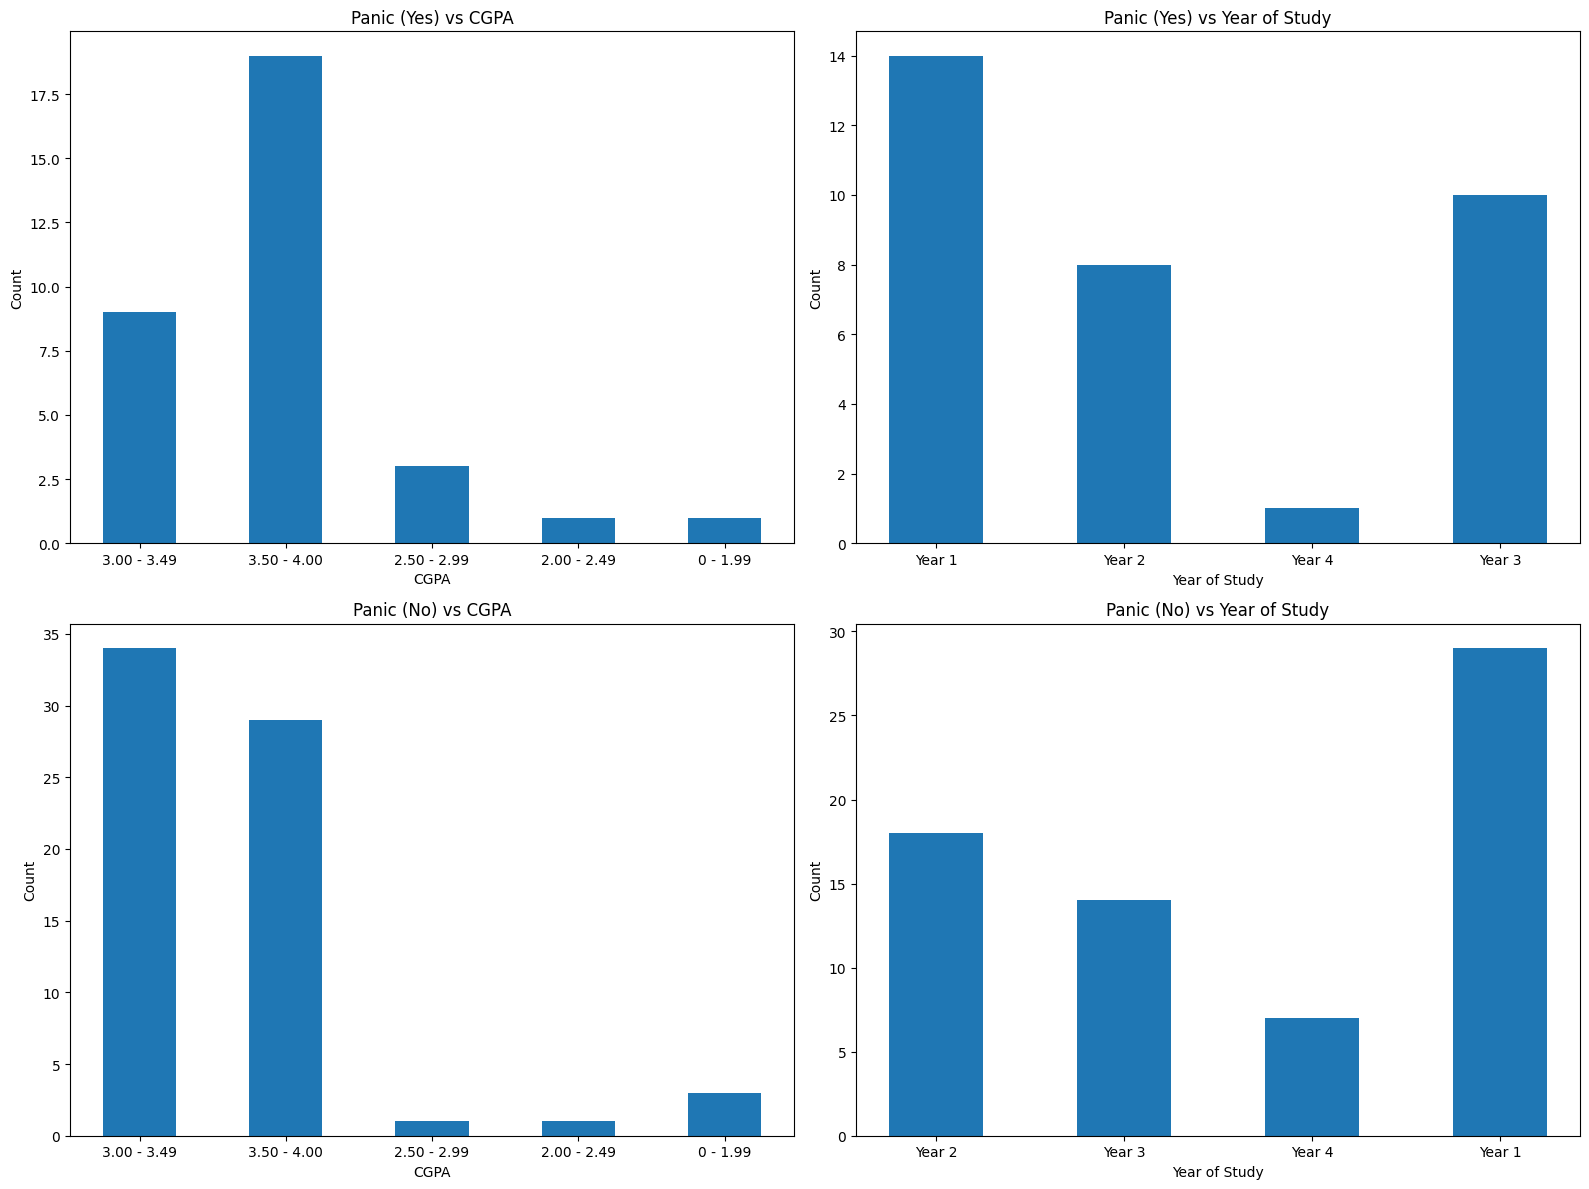

In [40]:
# Use the cleaned lists directly
group_values_pan = clean_pan
    
# Depression vs Year of Study with percentage
print("Panic vs Year of Study (with %):")
group_year = {}

for i in range(len(group_values_pan)):
    grp = group_values_pan[i]
    year = year_values[i].lower()
    if grp not in group_year:
        group_year[grp] = {}
    if year not in group_year[grp]:
        group_year[grp][year] = 0
    group_year[grp][year] += 1

for grp in group_year:
    total = sum(group_year[grp].values())
    print(f"{grp.title()}:")
    for year in group_year[grp]:
        count = group_year[grp][year]
        percent = (count / total) * 100
        print(f"  {year.title()}: {count} ({percent:.2f}%)")

# Depression vs CGPA with percentage
print("\nPanic vs CGPA (with %):")
group_gpa = {}

for i in range(len(group_values_pan)):
    grp = group_values_pan[i]
    gpa = gpa_values[i].lower()
    if grp not in group_gpa:
        group_gpa[grp] = {}
    if gpa not in group_gpa[grp]:
        group_gpa[grp][gpa] = 0
    group_gpa[grp][gpa] += 1

for grp in group_gpa:
    total = sum(group_gpa[grp].values())
    print(f"{grp.title()}:")
    for gpa in group_gpa[grp]:
        count = group_gpa[grp][gpa]
        percent = (count / total) * 100
        print(f"  {gpa}: {count} ({percent:.2f}%)")

# Prepare indices for "yes" and "no" PANIC
panic_yes_indices = [i for i, p in enumerate(clean_pan) if p == "yes"]
panic_no_indices  = [i for i, p in enumerate(clean_pan) if p == "no"]

# Slice CGPA / Year by those indices
cgpa_yes = [clean_gpa[i] for i in panic_yes_indices]
year_yes = [clean_year[i] for i in panic_yes_indices]
cgpa_no  = [clean_gpa[i] for i in panic_no_indices]
year_no  = [clean_year[i] for i in panic_no_indices]

# Unique labels + counts
cgpa_labels_yes, cgpa_counts_yes = get_counts(cgpa_yes)
year_labels_yes, year_counts_yes = get_counts(year_yes)
cgpa_labels_no,  cgpa_counts_no  = get_counts(cgpa_no)
year_labels_no,  year_counts_no  = get_counts(year_no)

# Plot (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Panic YES vs CGPA
axes[0, 0].bar([k.upper() for k in cgpa_labels_yes], cgpa_counts_yes, width=0.5)
axes[0, 0].set_title('Panic (Yes) vs CGPA')
axes[0, 0].set_xlabel('CGPA'); axes[0, 0].set_ylabel('Count')

# Panic YES vs Year of Study
axes[0, 1].bar([k.title() for k in year_labels_yes], year_counts_yes, width=0.5)
axes[0, 1].set_title('Panic (Yes) vs Year of Study')
axes[0, 1].set_xlabel('Year of Study'); axes[0, 1].set_ylabel('Count')

# Panic NO vs CGPA
axes[1, 0].bar([k.upper() for k in cgpa_labels_no], cgpa_counts_no, width=0.5)
axes[1, 0].set_title('Panic (No) vs CGPA')
axes[1, 0].set_xlabel('CGPA'); axes[1, 0].set_ylabel('Count')

# Panic NO vs Year of Study
axes[1, 1].bar([k.title() for k in year_labels_no], year_counts_no, width=0.5)
axes[1, 1].set_title('Panic (No) vs Year of Study')
axes[1, 1].set_xlabel('Year of Study'); axes[1, 1].set_ylabel('Count')

plt.tight_layout()

plt.savefig('panic_cgpa_year.png')
plt.show()

In [41]:
# Use the cleaned lists directly
group_values_treat = clean_treat
    
# Depression vs Year of Study with percentage
print("Having Treatment vs Year of Study (with %):")
group_year = {}

for i in range(len(group_values_treat)):
    grp = group_values_treat[i]
    year = year_values[i].lower()
    if grp not in group_year:
        group_year[grp] = {}
    if year not in group_year[grp]:
        group_year[grp][year] = 0
    group_year[grp][year] += 1

for grp in group_year:
    total = sum(group_year[grp].values())
    print(f"{grp.title()}:")
    for year in group_year[grp]:
        count = group_year[grp][year]
        percent = (count / total) * 100
        print(f"  {year.title()}: {count} ({percent:.2f}%)")

# Depression vs CGPA with percentage
print("\nHaving Treatment vs CGPA (with %):")
group_gpa = {}

for i in range(len(group_values_treat)):
    grp = group_values_treat[i]
    gpa = gpa_values[i].lower()
    if grp not in group_gpa:
        group_gpa[grp] = {}
    if gpa not in group_gpa[grp]:
        group_gpa[grp][gpa] = 0
    group_gpa[grp][gpa] += 1

for grp in group_gpa:
    total = sum(group_gpa[grp].values())
    print(f"{grp.title()}:")
    for gpa in group_gpa[grp]:
        count = group_gpa[grp][gpa]
        percent = (count / total) * 100
        print(f"  {gpa}: {count} ({percent:.2f}%)")

Having Treatment vs Year of Study (with %):
No:
  Year 1: 40 (42.11%)
  Year 2: 24 (25.26%)
  Year 3: 23 (24.21%)
  Year 4: 8 (8.42%)
Yes:
  Year 3: 1 (16.67%)
  Year 2: 2 (33.33%)
  Year 1: 3 (50.00%)

Having Treatment vs CGPA (with %):
No:
  3.00 - 3.49: 43 (45.26%)
  3.50 - 4.00: 44 (46.32%)
  2.50 - 2.99: 2 (2.11%)
  2.00 - 2.49: 2 (2.11%)
  0 - 1.99: 4 (4.21%)
Yes:
  3.50 - 4.00: 4 (66.67%)
  2.50 - 2.99: 2 (33.33%)
